<a href="https://colab.research.google.com/github/rvraghvender/DeepLearningProjects/blob/main/ConvolutionNeuralNetworks/ConvolutionNeuralNetworksApplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 - TensorFlow model

Utilize the programming frameworks to perform convolution neural networks operations.

In [309]:
# import relevant packages
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [310]:
print(tf.__version__)

2.12.0


In [311]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 0


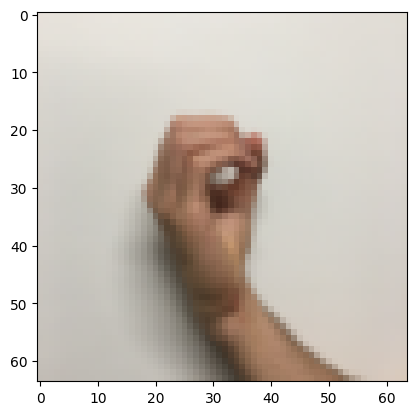

In [312]:
# Example of picture
index = 124
plt.imshow(X_train_orig[index])
print("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [313]:
# Exploring the dataset

# Normalizing the dataset
X_train = X_train_orig/255.0
X_test = X_test_orig/255.0

# Converting Y labels to one-hot vectors
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


<a name='4-3'></a>
### 4.3 - Forward Propagation

In TensorFlow, there are built-in functions that implement the convolution steps for you. By now, you should be familiar with how TensorFlow builds computational graphs. In the [Functional API](https://www.tensorflow.org/guide/keras/functional), you create a graph of layers. This is what allows such great flexibility.

However, the following model could also be defined using the Sequential API since the information flow is on a single line. But don't deviate. What we want you to learn is to use the functional API.

Begin building your graph of layers by creating an input node that functions as a callable object:

- **input_img = tf.keras.Input(shape=input_shape):**

Then, create a new node in the graph of layers by calling a layer on the `input_img` object:

- **tf.keras.layers.Conv2D(filters= ... , kernel_size= ... , padding='same')(input_img):** Read the full documentation on [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D).

- **tf.keras.layers.MaxPool2D(pool_size=(f, f), strides=(s, s), padding='same'):** `MaxPool2D()` downsamples your input using a window of size (f, f) and strides of size (s, s) to carry out max pooling over each window.  For max pooling, you usually operate on a single example at a time and a single channel at a time. Read the full documentation on [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D).

- **tf.keras.layers.ReLU():** computes the elementwise ReLU of Z (which can be any shape). You can read the full documentation on [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU).

- **tf.keras.layers.Flatten()**: given a tensor "P", this function takes each training (or test) example in the batch and flattens it into a 1D vector.

    * If a tensor P has the shape (batch_size,h,w,c), it returns a flattened tensor with shape (batch_size, k), where $k=h \times w \times c$.  "k" equals the product of all the dimension sizes other than the first dimension.

    * For example, given a tensor with dimensions [100, 2, 3, 4], it flattens the tensor to be of shape [100, 24], where 24 = 2 * 3 * 4.  You can read the full documentation on [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten).

- **tf.keras.layers.Dense(units= ... , activation='softmax')(F):** given the flattened input F, it returns the output computed using a fully connected layer. You can read the full documentation on [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In the last function above (`tf.keras.layers.Dense()`), the fully connected layer automatically initializes weights in the graph and keeps on training them as you train the model. Hence, you did not need to initialize those weights when initializing the parameters.

Lastly, before creating the model, you'll need to define the output using the last of the function's compositions (in this example, a Dense layer):

- **outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)**


#### Window, kernel, filter, pool

The words "kernel" and "filter" are used to refer to the same thing. The word "filter" accounts for the amount of "kernels" that will be used in a single convolution layer. "Pool" is the name of the operation that takes the max or average value of the kernels.

This is why the parameter `pool_size` refers to `kernel_size`, and you use `(f,f)` to refer to the filter size.

Pool size and kernel size refer to the same thing in different objects - They refer to the shape of the window where the operation takes place.

<a name='ex-2'></a>
### Exercise 2 - convolutional_model

Implement the `convolutional_model` function below to build the following model: `CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Use the functions above!

Also, plug in the following parameters for all the steps:

 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 8 4 by 4 filters, stride 1, padding is "SAME"
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Use an 8 by 8 filter size and an 8 by 8 stride, padding is "SAME"
 - **Conv2D**: Use 16 2 by 2 filters, stride 1, padding is "SAME"
 - **ReLU**
 - **MaxPool2D**: Use a 4 by 4 filter size and a 4 by 4 stride, padding is "SAME"
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 6 neurons and a softmax activation.

In [321]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tfl.Conv2D(filters=8, kernel_size=(4, 4), strides=(1,1), padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(filters=16, kernel_size=(2, 2), strides=(1,1), padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='same')(A2)
    F  = tfl.Flatten()(P2)
    outputs= tfl.Dense(units=6, activation='softmax')(F)
    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [322]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [323]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Train on 17 steps, validate on 2 steps
Epoch 1/100
17/17 [==============================] - ETA: 0s - batch: 8.0000 - size: 1.0000 - loss: 1.7959 - accuracy: 0.2093

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


17/17 [==============================] - 2s 97ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7959 - accuracy: 0.2093 - val_loss: 1.7882 - val_accuracy: 0.1833
Epoch 2/100
17/17 [==============================] - 1s 78ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7804 - accuracy: 0.2472 - val_loss: 1.7807 - val_accuracy: 0.2083
Epoch 3/100
17/17 [==============================] - 1s 82ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7705 - accuracy: 0.2824 - val_loss: 1.7734 - val_accuracy: 0.2333
Epoch 4/100
17/17 [==============================] - 2s 109ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7601 - accuracy: 0.3000 - val_loss: 1.7659 - val_accuracy: 0.2917
Epoch 5/100
17/17 [==============================] - 1s 78ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7479 - accuracy: 0.3306 - val_loss: 1.7558 - val_accuracy: 0.2917
Epoch 6/100
17/17 [==============================] - 1s 76ms/step - batch: 8.0000 - size: 1.0000 - loss: 1.7330 - accuracy: 0.3398 - val_loss: 1.7

In [324]:
history.history

{'loss': [1.7959148112465353,
  1.780429300139932,
  1.7705053652034086,
  1.7601259315715116,
  1.747929895625395,
  1.7329935606788187,
  1.7132506580913769,
  1.688396643189823,
  1.657565902261173,
  1.6227662142585306,
  1.5848400733050179,
  1.5444996917949003,
  1.5024667136809404,
  1.458953015944537,
  1.4147324141334086,
  1.3701459029141594,
  1.3273055343066944,
  1.2849414839464075,
  1.244795848341549,
  1.20702545783099,
  1.1714976324754602,
  1.1376529791775871,
  1.1063229020904093,
  1.0768162467900444,
  1.0488405262722689,
  1.0237889359979069,
  0.9985013183425454,
  0.9758938200333539,
  0.9521503413424772,
  0.9326501523747164,
  0.911711079232833,
  0.8928430781644934,
  0.8749681535889121,
  0.8574060376952676,
  0.8418595790863037,
  0.8271880255025976,
  0.8122046344420489,
  0.7990248343523811,
  0.7863372985054465,
  0.774090893128339,
  0.7622254245421466,
  0.7512023659313426,
  0.7406538514529958,
  0.7306467995924109,
  0.7206166071050307,
  0.71153145

<ipython-input-325-55f5ebfbfb89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-325-55f5ebfbfb89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

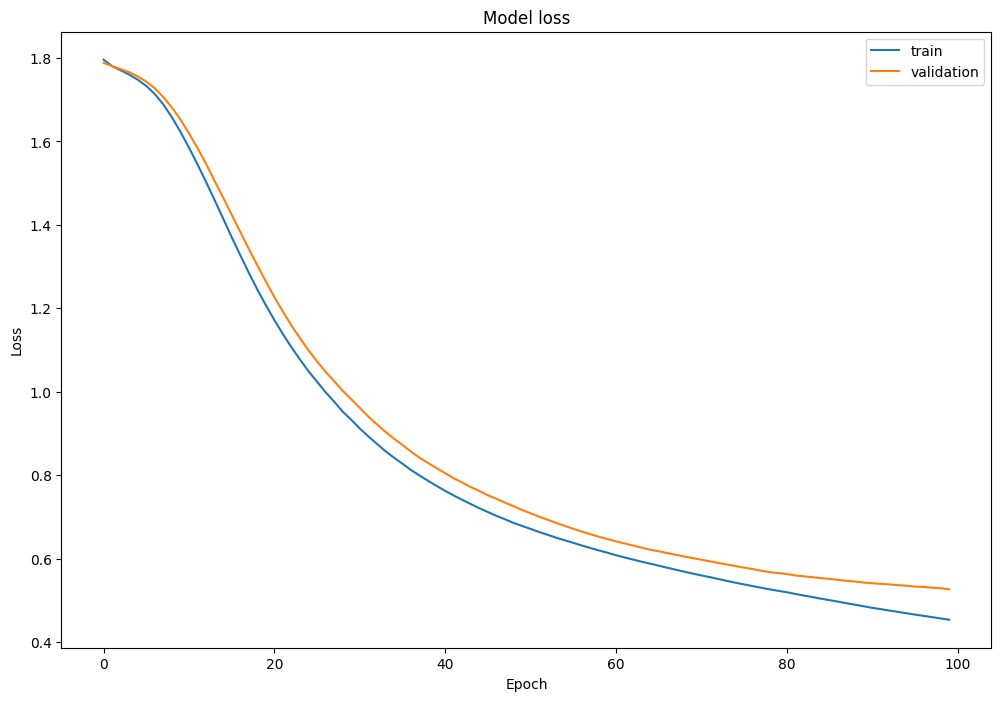

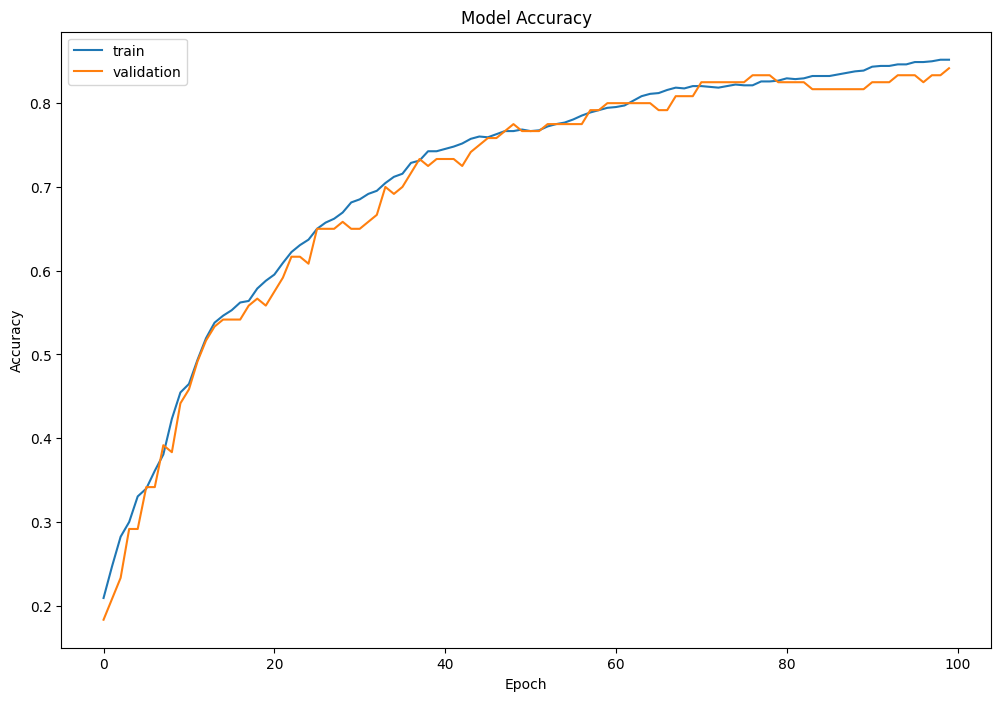

In [325]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [ ]:
happy_model.evaluate(X_test, Y_test)

<a name='4'></a>
## 4 - The Functional API

Welcome to the second half of the assignment, where you'll use Keras' flexible [Functional API](https://www.tensorflow.org/guide/keras/functional) to build a ConvNet that can differentiate between 6 sign language digits.

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon!